# Using 'Isotope' class for Picarro calculations

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


This notebook makes use of a new python class: Isotope.
This class and its methods are found in the module Picarro, which we import below.

In [2]:
import Picarro as pica

## Get a full run of the data
In the Picarro module, it is possible to directly call for a full run of the data.

This takes the form of:

   ```O18,D = Picarro.FullRun(filename)```

and returns two instances of the Isotope class.

In [3]:
O18,D = pica.FullRun("example_data/HKDS2009_IsoWater_20191104_084429.csv")

Running the corrections for Oxygen 
 ... 
 ...
creating a directory to store the data
Standard dev too high get rid of measurement 4
Standard dev is good
Standard dev too high get rid of measurement 2
too high std. deviation
Standard dev is good
Standard dev is good
Standard dev is good
Standard dev too high get rid of measurement 4
Standard dev too high get rid of measurement 1
Standard dev is good
Standard dev is good
Standard dev too high get rid of measurement 1
too high std. deviation
Standard dev is good
Standard dev is good
Standard dev is good
5
missing measurements 3 and 0
get rid of measurements  3 and 0
['3', '0']
1
missing measurements 4 and 2
get rid of measurements  4 and 2
['4', '2']
Standard dev too high get rid of measurement 2
Measured:0.64 --- Standard: 0.60 --- Difference: +0.04 
Measured:-29.85 --- Standard: -29.88 --- Difference: +0.03 
Measured:-13.47 --- Standard: -13.40 --- Difference: +0.07 
Done! 
 ... 
 ...
 ... 
 ...
Running the corrections for Deuterium 
 

## Overview of the Isotope class

In the **Isotope** class, a variety of methods are available, so of which are used discreetly in the `FullRun()` function above.

They are:

For an initial treatment of the data:
```
readRaw() 
checkEmpty()
checkVolume()
runSummary()
```

For the computation of correction coefficients (workhorse of the class)
```
IsotopeSelect()
initMemCoeffs()
Optimize()
MemoryCorrection()
driftCorrect()
VSMOWcorrect()
```

For additional checks
```
getMeanSDs()
checkStandards()
```

For plotting convenience:

```
plotSummary()
memCorrPlot()
driftCorrPlot()
VSMOWCorrPlot()
```

## Other functions of the Picarro module

Below are a list of other functions available within the Picarro module:

```
1) Run()
2) FullRun()
3) Merge()
4) OverviewPlot()
5) DatatoCSV()
```

#### 1 Picarro.Run()

This function takes in two arguments: 
1. Isotope of choice: "O" or "D"
2. Filename: the path to csv data

Returns an object of class **Isotope**

An example usage: 

``` Isotope = Picarro.Run(isotope,path/to/file)```

#### 2 Picarro.FullRun()

This function takes in one argument:
1. Filename: the path to csv data

It returns two objects of class **Isotope**. The first one contains Oxygen data, the second, deuterium. 
To be used thus:

``` O18,D = Picarro.FullRun(path/to_file)```

*Note that this is what was done in the cells above, for the 'quick and dirty' full run of the data*



#### 3 Picarro.Merge()

This function takes two arguments; each must be an instance of class **Isotope**. It returns a pandas DataFrame, containing the summary data of the run.

Example usage: 

``` df = Picarro.Merge(Iso1,Iso2)```



In [4]:
df = pica.Merge(O18,D)

df.head(19)

,Identifier 1,Identifier 2,d18O vsmow,d18O stdev. vsmow,d18O counts,d2H vsmow,d2H stdev. vsmow,d2H counts
0,GE-20,TR,-10.871067,0.039434,3,-77.148476,0.600055,4
1,GE-21,TR,-11.395357,0.068516,4,-79.713722,0.332615,4
2,GE-22,TR,-11.410921,0.069449,2,-80.940186,0.436256,3
3,GE-23,TR,-12.088083,NaN,1,-84.422820,NaN,1
4,GE-24,TR,-11.268830,0.009502,4,-78.661139,0.123885,4
5,GE-25,TR,-10.866316,0.012125,4,-75.428293,0.089963,4
6,GE-26,TR,-11.017207,0.084280,4,-77.704982,0.580817,4
7,GE-27,TR,-11.971911,0.051992,3,-85.078775,0.266089,3
8,GE-28,TR,-11.742195,0.042005,3,-82.354113,0.460720,3
9,GE-29,TR,-11.295546,0.044056,4,-78.748812,0.081418,4


#### 4 Picarro.OverviewPlot()

This function takes two arguments; each must be an instance of class **Isotope**. It enables the plotting of the summary data.

Example usage:

```Picarro.OverviewPlot(Iso1,Iso2)```


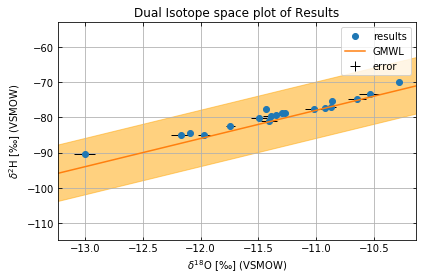

In [5]:
pica.OverviewPlot(O18,D)

#### 5 Picarro.DatatoCSV()

This function takes two arguments; each must be an instance of class **Isotope**. The function writes the data to csv file for convenience of the user. 

Further development should include:

1. Checking that the file does not already exist.
2. Writing a new file it does not.

Example usage:

```Picarro.DatatoCSV(Iso1,Iso2)```



In [6]:
pica.OverviewDatatoCSV(O18,D)

Directory already exists
writing data file
writing run summary file


In [7]:


def runCheck2(df1,col4):
			df = df1.copy()
			
			df = df[col4]
			
			stds = [] 
			stds.append((df.std(),"no missing measurements"))
			
			for i in range(len(df)):
				statement1 = "missing measurement {}".format((i)%4)
				stds.append((df.iloc[[i,(i+1)%4,(i+2)%4]].std(),statement1))
				statement2 ="missing measurements {} and {}".format((i)%4,(i+1)%4)
				stds.append((df.iloc[[i,(i+1)%4]].std(),statement2))
				if i <2:
					statement3 ="missing measurements {} and {}".format((i-1)%4+1,(i+1)%4+1)
					stds.append((df.iloc[[i,(i+2)%4]].std(),statement3))

			def checks(mylist):
				
				if mylist[0][0]<0.1:
					print("Standard dev is good")
				else:
					conds = [mylist[1][0],mylist[4][0],mylist[7][0],mylist[9][0]]
					if min(conds) <0.1:
						val = ((conds.index(min(conds))-1)%4)+1
						print("Standard dev too high get rid of measurement {}".format(val))
						df1.drop(index = val ,level = 1, inplace = True)
						
					else:
						conds2 = [mylist[2][0],mylist[3][0],mylist[5][0],mylist[6][0],mylist[8][0],mylist[10][0]]
						if min(conds2) < 0.1:
							value= conds2.index(min(conds2))
							print(stds[value+1][1])
							print("get rid of measurements {}".format(stds[value+1][1][-8:]))
							vals_to_drop = [stds[value+1][1][-7],stds[value+1][1][-1]]
							print(vals_to_drop)
							df1.drop(index = str(vals_to_drop[0]) ,level = 1, inplace = True)
							df1.drop(index = str(vals_to_drop[1]) ,level = 1, inplace = True)
						else:
							print("too high std. deviation")

			checks(stds)
			return df1

In [8]:
col4 = "d(18_16)vsmow_corrected"
df = O18.vsmow.loc["GE-36"]
runCheck2(df,col4)

missing measurements 1 and 3
get rid of measurements  1 and 3
['1', '3']


/Users/AchilleTalon/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Line  d(18_16)Mean  d(18_16)mem_corrected  Error Code  \
Identifier 2 Inj Nr                                                           
TR           1       117.0       -14.695             -14.520543         0.0   
             2       118.0       -14.378             -14.332527         0.0   
             3       119.0       -14.318             -14.296023         0.0   
             4       120.0       -14.546             -14.532275         0.0   

                     d(18_16)drift_corrected  d(18_16)vsmow_corrected  
Identifier 2 Inj Nr                                                    
TR           1                    -14.609450               -11.426702  
             2                    -14.422193               -11.243416  
             3                    -14.386449               -11.208430  
             4                    -14.623462               -11.440416